<a href="https://colab.research.google.com/github/Graeme29/tensorflow2.0-examples/blob/master/Formation_Tensorflow2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pour un perceptron, les poids des synapses reliés aux zones importantes sont élevés (positif) et ceux reliés aux zones moins importantes sont faibles (négatif)

Pour un perceptron non entrainé, un exemple :
E = |0.1-1| = 0.9

---


Ce n'est pas bon, 0.1 étant la valeur de sortie et 1 la valeur attendue

Descente de gradient : 
On va changer les poids

On calcule la gradient de l'erreur par rapport à la sortie afin de savoir comment modifier les poids pour réduire l'erreur (augmenter pour les zones importantes et diminuer pour les zones non importantes)

Dans un réseau de neurones, on peut avoir des poids élevé dabord et les ajuster par la suite après la 1ère couche d'entree

Plus on a de neurone sur les 1ères couches, plus on peut traiter d'informations et détecter des paternes

# **Import**

In [1]:
#matplotlib
import matplotlib.pyplot as plt
#tensorflow
import tensorflow as tf
#numpy and pandas
import numpy as np
import pandas as pd
#other import 
import sys

from tensorflow import keras #pour simplifier le code
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D

# **Be sur to use Tensorflow 2.0**

In [2]:
assert hasattr(tf,"function") #be sure to use tensorflow

# **Load the dataset : Fashion MNIST**

In [3]:
#Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist #on importe la dataset
(images, targets), (_, _) = fashion_mnist.load_data() #on ne s'intéresse qu'aux images et aux targets ici

#get only a subpart of the dataset
#get only a subpart
images = images[:10000]
targets = targets[:10000]

print(images.shape)
print(targets.shape)

print(images[0])

4423680/4422102 [==============================] - 0s 0us/step
(10000, 28, 28)
(10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 1

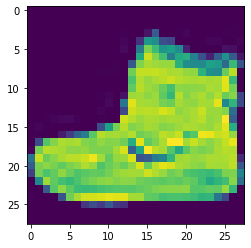

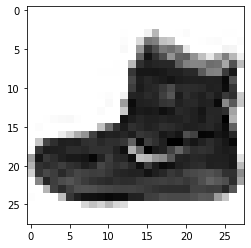

In [4]:
plt.imshow(images[0])
plt.show()

plt.imshow(images[0],cmap="binary")
plt.show()

# **Plot one of the data**

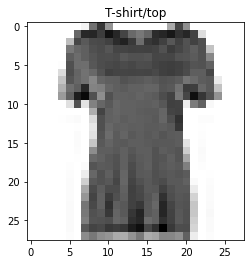

In [5]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot one image
plt.imshow(images[10], cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

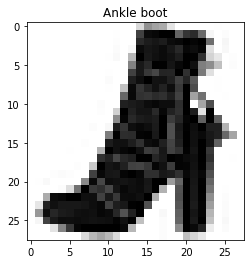

In [6]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot one image
plt.imshow(images[11], cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

In [7]:
print("First line of one image", images[11][0])
print("Associated target", targets[11])
#les valeurs correspondent aux niveaux de gris de chaque pixel de l'image

First line of one image [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85
  27   0   0   0   0   0   1   0   0   0]
Associated target 9


# **Create the model**

# **Flatten the image**

In [8]:
#Create the model
model = models.Sequential() #on a la base du model
model.add(layers.Flatten(input_shape=[28,28])) #on aplatit l'image pour avoir un vecteur de 784 valeurs

print("Shape of the image", images[0:1].shape) #on a une image de 28x28
model_output = model.predict(images[0:1]) #on transforme l'image en vecteur de 784 valeurs
print("Shape of the image after the Flatten", model_output.shape) #on a bien 784 valeurs en sortie

Shape of the image (1, 28, 28)
Shape of the image after the Flatten (1, 784)


# **Add the layers**

In [20]:
#Flatten
model = models.Sequential() #on a la base du model
model.add(layers.Flatten(input_shape=[28,28])) #on aplatit l'image pour avoir un vecteur de 784 valeurs

#Add the layer
model.add(layers.Dense(256, activation="relu")) #définit un layer à 256 neurone
model.add(layers.Dense(128, activation="relu")) #définit un layer à 128 neurone
model.add(layers.Dense(10, activation="softmax")) #définit un layer à 10 neurone

model_output = model.predict(images[0:1])
print(model_output,targets[0:1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] [9]


On remarque la valeur attendue est 1 pour la classe 9, mais ce n'est pas le cas ici

# **Model Summary**

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


# **Compile the model**

In [21]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy", #fonction d'erreur
    optimizer="sgd", #permet d'optimiser l'erreur (descente de gradient)
    metrics=["accuracy"] #pourcentage de bonne prédiction
)

# **Train the model**

In [22]:
history = model.fit(images,targets,epochs=10)

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 571473897729263680.0000 - accuracy: 0.0963
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1004
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3028 - accuracy: 0.0947
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3025 - accuracy: 0.1036
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3024 - accuracy: 0.1014
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3024 - accuracy: 0.1057
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.0999
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1048
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1025
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3025 -

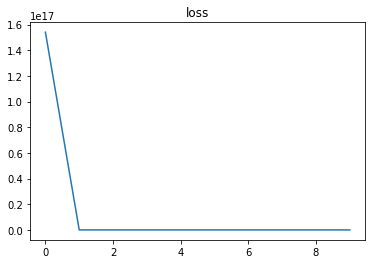

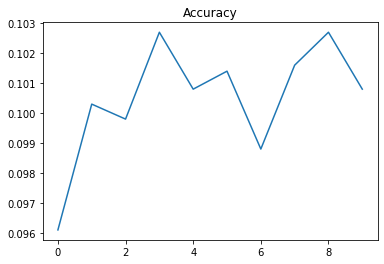

In [23]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()